<a href="https://colab.research.google.com/github/MattiaFiore/ATP_BMv2/blob/master/Wireless_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Testing section

In [ ]:
files = ['dataset-0.15.csv',
         'dataset-0.3.csv',
         'dataset-0.5.csv',
         'dataset-1.0.csv',
         'dataset-2.5.csv']

# All possible features:
# 'avg datalen dl'
# 'std datalen dl'
#  'n_packets dl',
#  'avg intertime dl',
#  'std intertime dl',
#  'avg datalen ul',
#  'std datalen ul',
#  'n_packets ul',
#  'avg intertime ul',
#  'std intertime ul'

# Here it is possible to select different features
features = [ 'avg datalen dl', 'std datalen dl', 'std datalen ul', 'avg datalen ul']

# Here it is possible to modify the metric
metric = 'euclidean'
# Here you can set the maximum k for the test
K_max = 50

print(f'Params: {features}')
print(f'Metric: {metric}')



for l in files:

  # read the csv file
  df = pd.read_csv(l)

  # These lines are used to get rid of the rows with 0 and -1
  # since both mean and std are computed when packets are more than 2
  df.drop(df[df['n_packets dl'] < 2].index, inplace = True)
  df.drop(df[df['n_packets ul'] < 2].index, inplace = True)

  # select the features
  df = df[features + ['supervised']]
  df.dropna(inplace = True, subset= features)

  #randmoly scramble the dataset
  df = df.sample(frac=1)

  #creating the grouped dataset
  df2 = df.copy()

  dictionary = {
            'netflix':'VOD',
            'youtube': 'VOD',
            'amazon': 'Web browsing',
            'wikipedia': 'Web browsing',
            'instagram': 'Social Network',
            'whatsappweb': 'Messaging',
            'telegram': 'Messaging',
            'zoom': 'Video call'
            }

  df2['supervised'] = df['supervised'].apply(lambda x: dictionary[x])

  print(f'DATABASE: {l}')


  X = df.drop(['supervised'],axis=1);
  Y = df['supervised'];

  ACCURACY = []
  # We repeat for all K up to K_max
  for k in range(1,K_max):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric = metric)
    # we use cross-validation 10 fold
    score = cross_val_score(knn, X, Y, cv = 10)
    # we add to the accuracy list the mean of the cross-validations scores
    ACCURACY.append(np.mean(score))


  print(f'Lista separata: {max(ACCURACY)}')
  print(f'Media: {sum(ACCURACY)/len(ACCURACY)}')


  X = df2.drop(['supervised'],axis=1);
  Y = df2['supervised'];


  ACCURACY = []
  for k in range(1,K_max):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric = metric)
    score = cross_val_score(knn, X, Y, cv = 10)
    ACCURACY.append(np.mean(score))


  print(f'Lista raggruppata: {max(ACCURACY)}')
  print(f'Media: {sum(ACCURACY)/len(ACCURACY)}')

# Results

Lista raggruppata: 0.7294834608071904
Media: 0.7222740096611765
8
0.7294834608071904


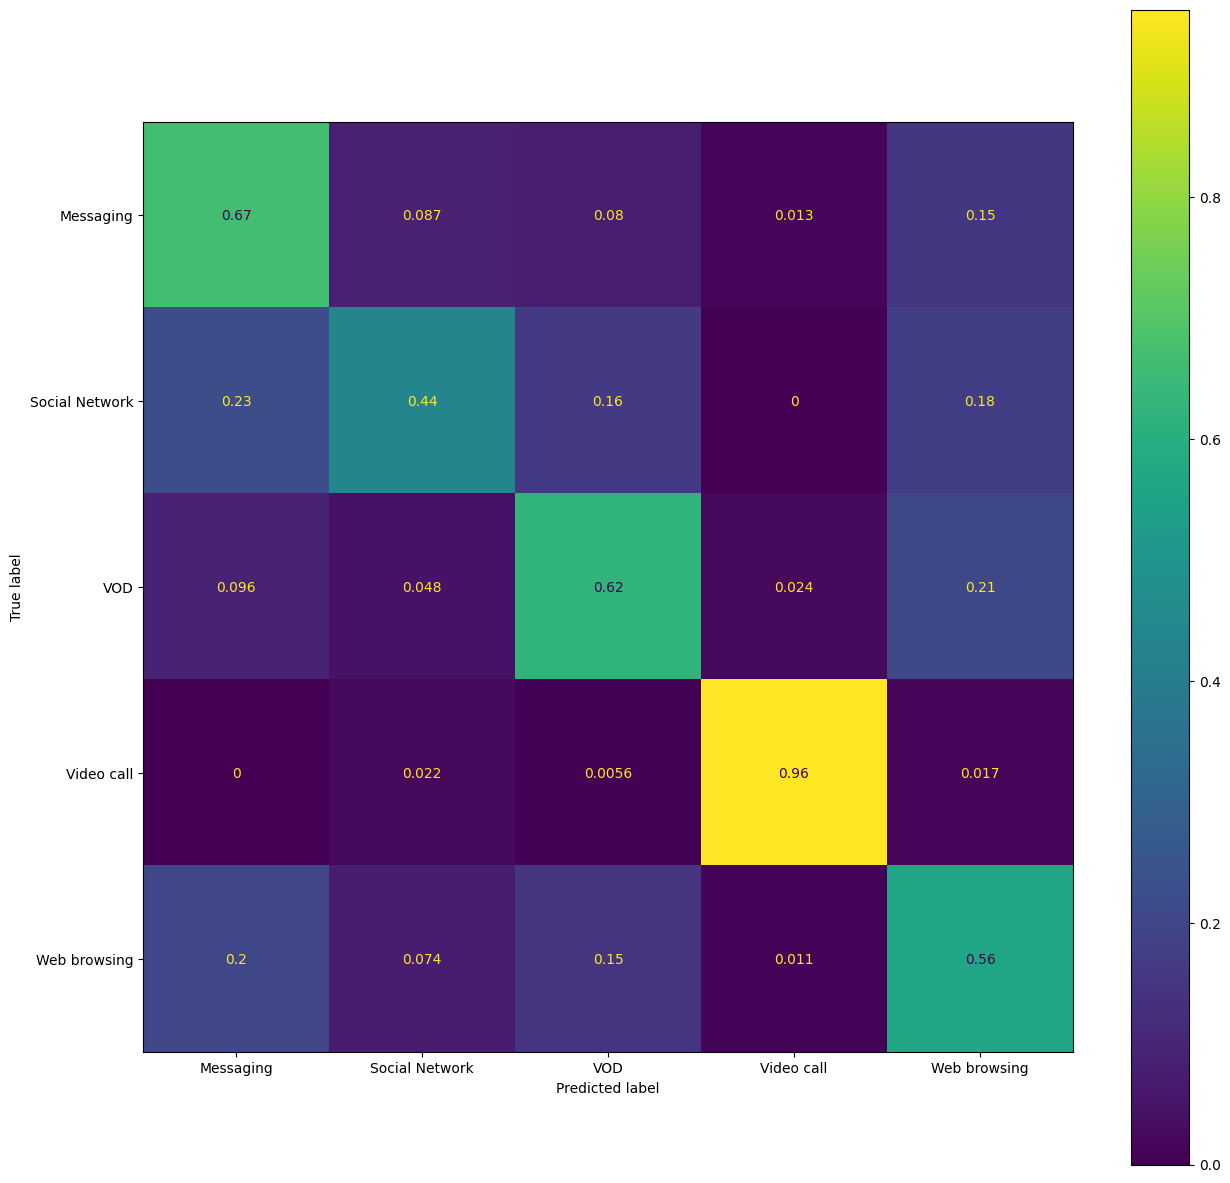

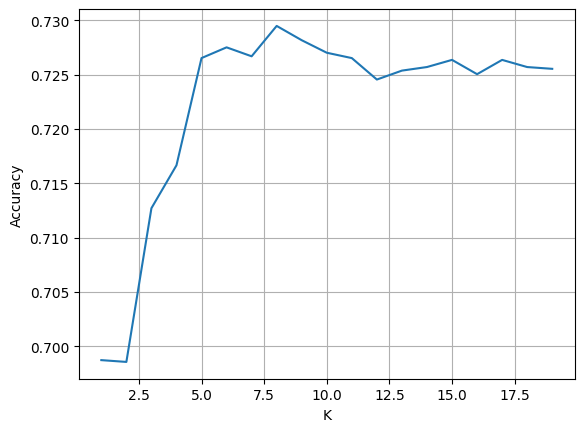

In [ ]:

# First we use just the avg dl data len
# Avg interarrival time in downlink


params = [ 'avg datalen dl','std datalen dl', 'avg datalen ul', 'std datalen ul']
#params = ['avg datalen dl', 'std datalen dl', 'n_packets dl', 'avg intertime dl', 'std intertime dl', 'avg datalen ul', 'std datalen ul', 'n_packets ul', 'avg intertime ul', 'std intertime ul']
metric = 'euclidean'

K_max = 20

df = pd.read_csv('dataset-0.15.csv')


df.drop(df[df['n_packets dl'] < 2].index, inplace = True)
df.drop(df[df['n_packets ul'] < 2].index, inplace = True)
df = df[params + ['supervised']]
df.dropna(inplace = True, subset= params)
df = df.sample(frac=1)

df2 = df.copy()

dictionary = {
            'netflix':'VOD',
            'youtube': 'VOD',
            'amazon': 'Web browsing',
            'wikipedia': 'Web browsing',
            'instagram': 'Social Network',
            'whatsappweb': 'Messaging',
            'telegram': 'Messaging',
            'zoom': 'Video call'
            }

df2['supervised'] = df['supervised'].apply(lambda x: dictionary[x])

X = df2.drop(['supervised'],axis=1);
Y = df2['supervised'];

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X = df2.drop(['supervised'],axis=1);
Y = df2['supervised'];

ACCURACY = []
for k in range(1,K_max):
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric = metric)
  score = cross_val_score(knn, X, Y, cv = 10)
  ACCURACY.append(np.mean(score))

print(f'Lista raggruppata: {max(ACCURACY)}')
print(f'Media: {sum(ACCURACY)/len(ACCURACY)}')

# computing best k
bestk = np.argmax(ACCURACY)+1
# Re running the algorithm
knn = KNeighborsClassifier(n_neighbors=bestk, weights='distance')
knn.fit(X_train, y_train)
# Compute predictions
knn_predict = knn.predict(X_test)
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(15, 15));
ConfusionMatrixDisplay.from_predictions(knn_predict, y_test, ax=ax, normalize='true');

fig = plt.figure();
plt.plot(range(1,K_max),ACCURACY);
plt.grid(visible=True);
plt.xlabel('K');
plt.ylabel('Accuracy');

Lista raggruppata: 0.6584427123844093
Media: 0.6518732033122735
0.6584427123844093
19


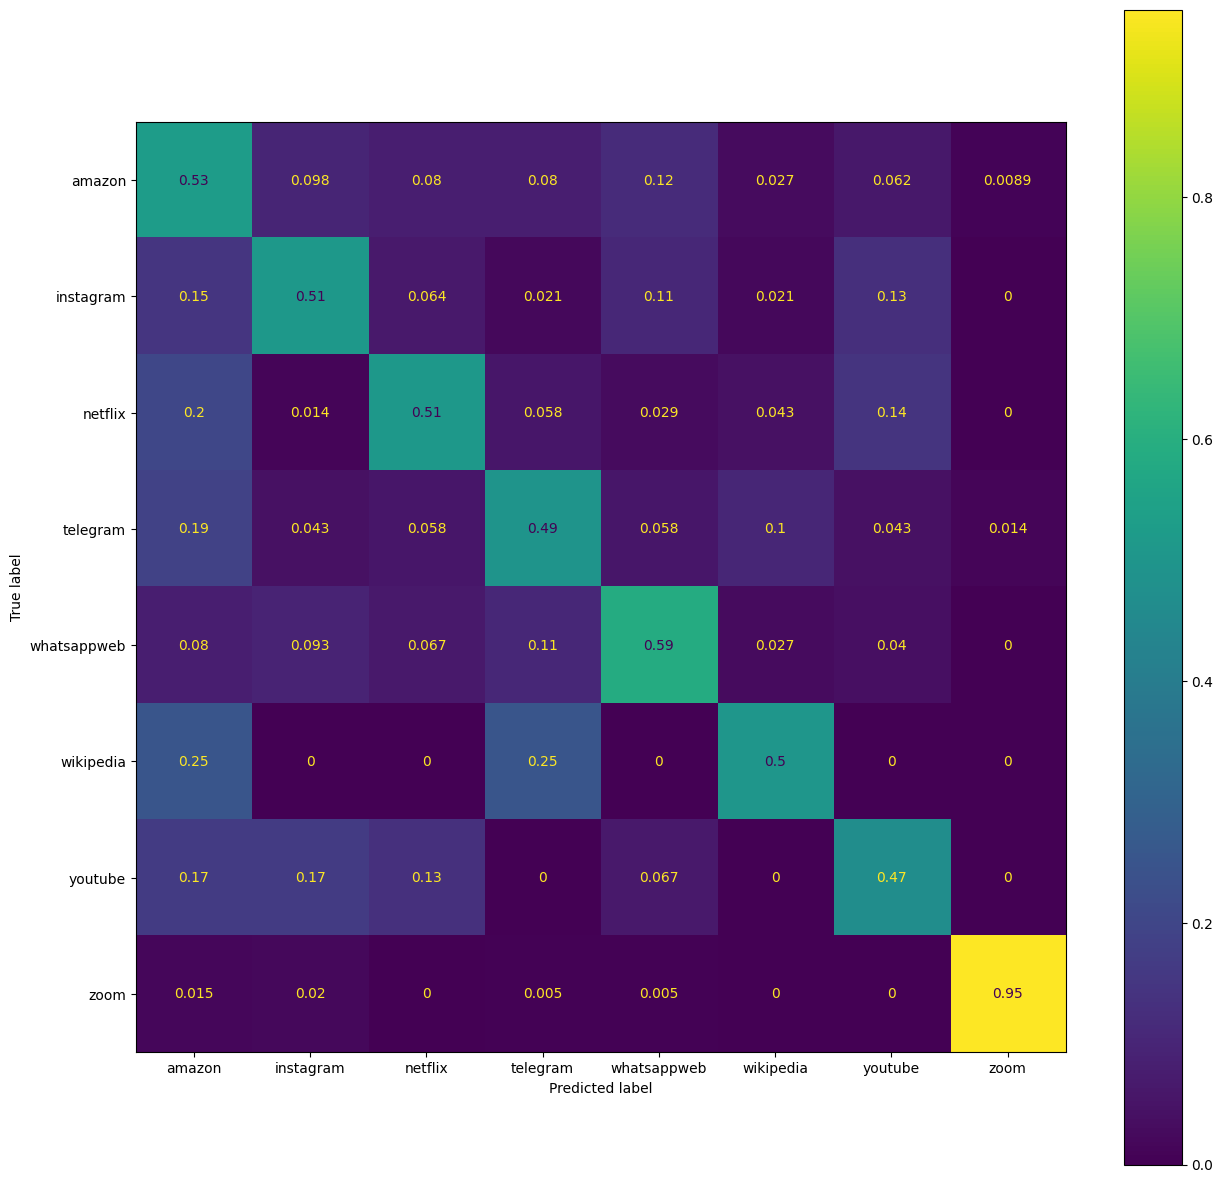

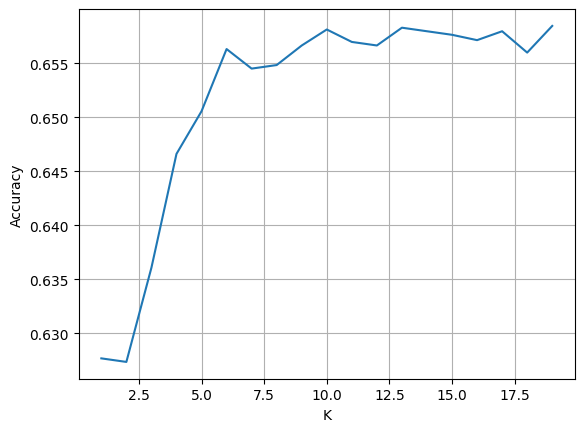

In [ ]:

params = [ 'avg datalen dl','std datalen dl', 'avg datalen ul', 'std datalen ul', 'n_packets dl']
#params = ['avg datalen dl', 'std datalen dl', 'n_packets dl', 'avg intertime dl', 'std intertime dl', 'avg datalen ul', 'std datalen ul', 'n_packets ul', 'avg intertime ul', 'std intertime ul']
metric = 'euclidean'

K_max = 20

df = pd.read_csv('dataset-0.15.csv')

'''
df.drop(df[df['supervised'] == 'amazon'].index, inplace = True)
df.drop(df[df['supervised'] == 'wikipedia'].index, inplace = True)
'''

df.drop(df[df['n_packets dl'] < 2].index, inplace = True)
df.drop(df[df['n_packets ul'] < 2].index, inplace = True)
df = df[params + ['supervised']]
df.dropna(inplace = True, subset= params)
df = df.sample(frac=1)


X = df.drop(['supervised'],axis=1);
Y = df['supervised'];

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACCURACY = []
for k in range(1,K_max):
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric = metric)
  score = cross_val_score(knn, X, Y, cv = 10)
  ACCURACY.append(np.mean(score))

print(f'Lista raggruppata: {max(ACCURACY)}')
print(f'Media: {sum(ACCURACY)/len(ACCURACY)}')

bestk = np.argmax(ACCURACY)+1
print(max(ACCURACY))
print(bestk)
knn = KNeighborsClassifier(n_neighbors=bestk, weights='distance')
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
fig, ax = plt.subplots(figsize=(15, 15));
ConfusionMatrixDisplay.from_predictions(knn_predict, y_test, ax=ax, normalize='true');

fig = plt.figure();
plt.plot(range(1,K_max),ACCURACY);
plt.grid(visible=True);
plt.xlabel('K');
plt.ylabel('Accuracy');